# Linear regression using NumPy

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

In [2]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42) # Why 42 (It works well for computer science) - https://medium.com/@leticia.b/the-story-of-seed-42-874953452b94


# randomly generate x which is a vector of 100 points 
x = np.random.rand(100, 1)

# define exact linear function y = 1 + 2x + epsilon where epsilon (0.1*random numbers)
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

In [16]:
np.random.seed(42)
x = np.random.rand(100, 1)
x
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

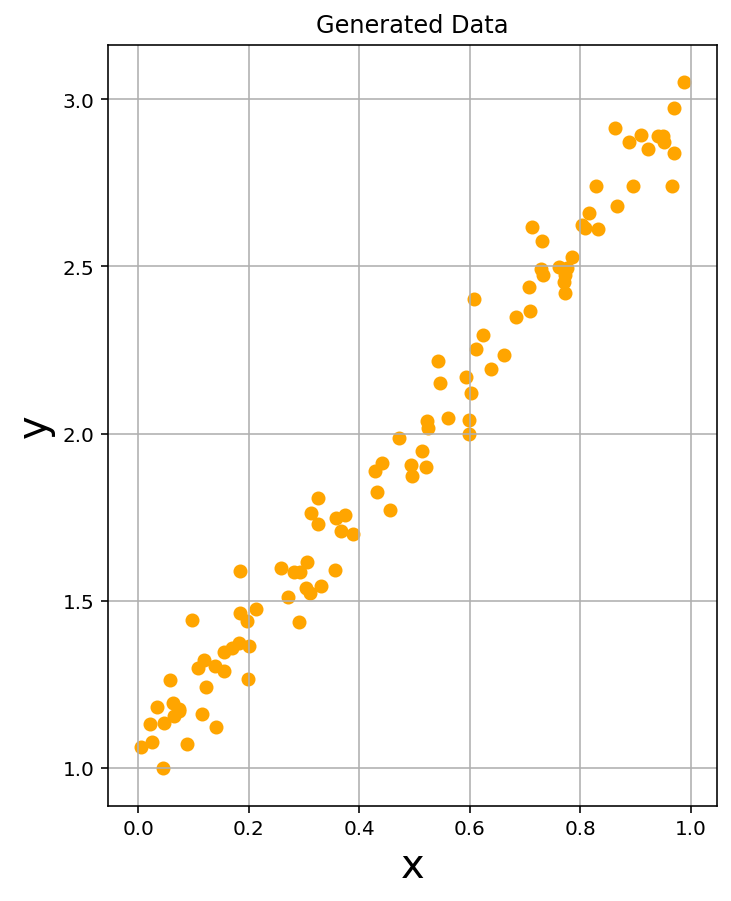

In [17]:
plt.subplot(1,2,1)
plt.scatter(x, y, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data')
plt.grid('on')

## split data into train and validation\(or test\) sets \(80/20\)



In [3]:
# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


In [18]:
idx = np.arange(100)
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [21]:
np.random.shuffle(idx)
idx

array([38, 26, 95, 41, 60, 99, 93, 98,  8, 72, 94, 57, 10, 50, 16, 65,  5,
       69, 12, 31, 53, 48, 82, 59, 22, 79, 30, 52, 74, 21, 83, 80, 63, 17,
       32, 85, 71, 20, 25,  1, 73,  0, 89, 23, 87, 70, 75, 97, 96, 76, 39,
       78,  7, 33,  6, 77, 45, 19, 36,  4, 18, 42, 62, 66, 88, 43, 91, 14,
       49, 51, 67, 15, 46, 68, 86, 28, 61, 35,  2, 29, 90, 13, 84, 92, 58,
        3, 27,  9, 64, 44, 11, 47, 24, 55, 81, 40, 54, 34, 56, 37])

In [23]:
train_idx = idx[:80]
train_idx

array([38, 26, 95, 41, 60, 99, 93, 98,  8, 72, 94, 57, 10, 50, 16, 65,  5,
       69, 12, 31, 53, 48, 82, 59, 22, 79, 30, 52, 74, 21, 83, 80, 63, 17,
       32, 85, 71, 20, 25,  1, 73,  0, 89, 23, 87, 70, 75, 97, 96, 76, 39,
       78,  7, 33,  6, 77, 45, 19, 36,  4, 18, 42, 62, 66, 88, 43, 91, 14,
       49, 51, 67, 15, 46, 68, 86, 28, 61, 35,  2, 29])

In [0]:
:80 ending at 80

In [25]:
val_idx = idx[80:]
val_idx

array([90, 13, 84, 92, 58,  3, 27,  9, 64, 44, 11, 47, 24, 55, 81, 40, 54,
       34, 56, 37])

In [0]:
80: 80 onwards

In [26]:
x_train = x[train_idx]

In [27]:
x_train

array([[0.68423303],
       [0.19967378],
       [0.4937956 ],
       [0.49517691],
       [0.38867729],
       [0.10789143],
       [0.5612772 ],
       [0.02541913],
       [0.60111501],
       [0.00552212],
       [0.77096718],
       [0.19598286],
       [0.02058449],
       [0.96958463],
       [0.30424224],
       [0.54269608],
       [0.15599452],
       [0.98688694],
       [0.83244264],
       [0.17052412],
       [0.89482735],
       [0.54671028],
       [0.33089802],
       [0.32533033],
       [0.29214465],
       [0.11586906],
       [0.60754485],
       [0.93949894],
       [0.70685734],
       [0.13949386],
       [0.06355835],
       [0.86310343],
       [0.35675333],
       [0.52475643],
       [0.06505159],
       [0.32518332],
       [0.19871568],
       [0.61185289],
       [0.78517596],
       [0.95071431],
       [0.81546143],
       [0.37454012],
       [0.47221493],
       [0.36636184],
       [0.63755747],
       [0.77224477],
       [0.72900717],
       [0.427

In [28]:
y_train = y[train_idx]

In [29]:
x_test = x[val_idx]

In [30]:
x_test

array([[0.11959425],
       [0.21233911],
       [0.31098232],
       [0.76078505],
       [0.04522729],
       [0.59865848],
       [0.51423444],
       [0.70807258],
       [0.28093451],
       [0.25877998],
       [0.96990985],
       [0.52006802],
       [0.45606998],
       [0.92187424],
       [0.62329813],
       [0.12203823],
       [0.59789998],
       [0.96563203],
       [0.0884925 ],
       [0.09767211]])

In [32]:
y_test = y[val_idx]

In [33]:
y_test

array([[1.32139451],
       [1.47600496],
       [1.52449648],
       [2.49703129],
       [0.99851215],
       [1.99856008],
       [1.94824115],
       [2.36596945],
       [1.58461501],
       [1.59666316],
       [2.97269482],
       [1.89995094],
       [1.77060289],
       [2.85060477],
       [2.29397955],
       [1.24060529],
       [2.04073361],
       [2.73938694],
       [1.07075463],
       [1.44166844]])

## plot the train and validation sets

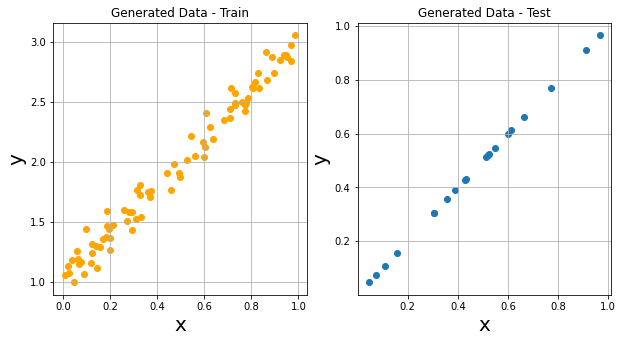

In [4]:
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the validation set 
plt.subplot(1,2,2)
plt.scatter(x_val,x_val)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

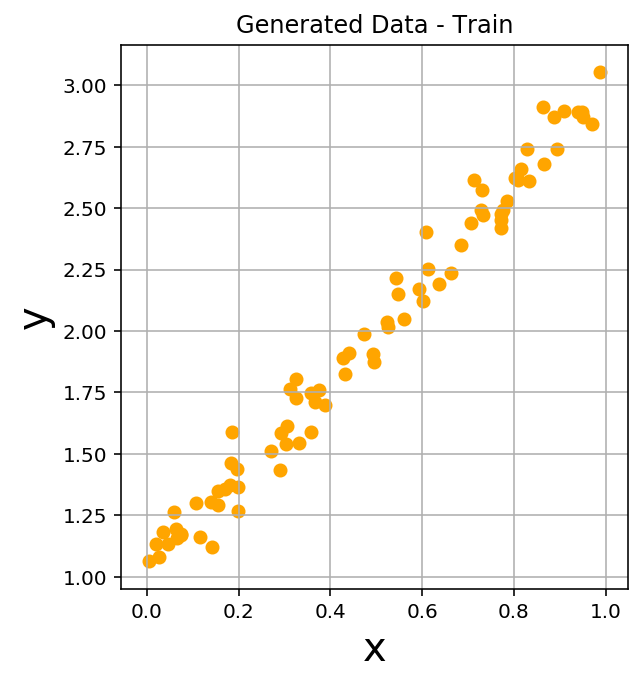

In [34]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

plt.show()

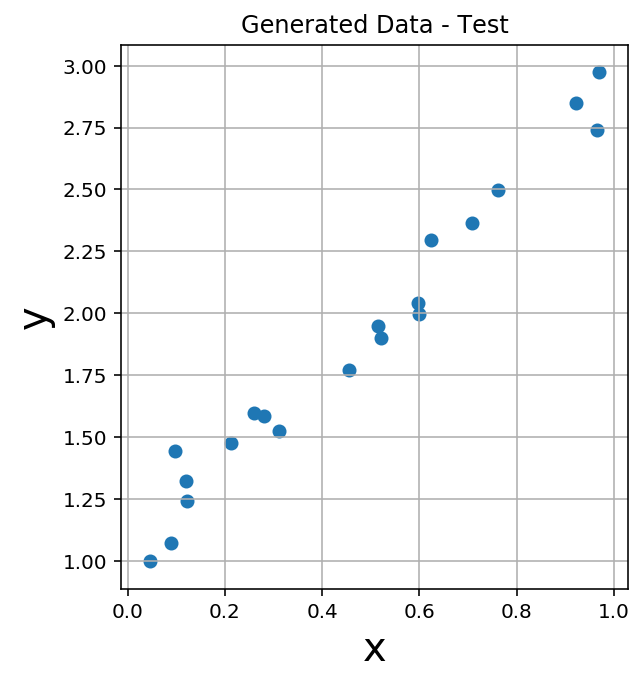

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

## linear regression using numpy 

In [36]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42)

# Initializes parameters "a" and "b" randomly - they don't need to be good yet
a = np.random.randn(1)
b = np.random.randn(1)

# print values of a and b 
print(a, b)


[0.49671415] [-0.1382643]


In [37]:
# Initialization of hyper-parameters (in our case, only learning rate and number of epochs)

# Sets learning rate (how much the AI conforms to each set of feedbacks)
lr = 1e-1
# Defines number of epochs (how many times training is repeated)
n_epochs = 1000

### For each epoch, there are 5 training steps:
* Compute model’s predictions 
* Compute the error (the difference between the actual value and predicted value) 
* Compute the loss ( mean square error = the average of (error)^2)
* Compute the gradients for every parameter (require calculus)
* Update the parameters a and b

In [38]:
for epoch in range(n_epochs):
    # Computes our model's predicted output
    yhat = a + b * x_train
    
    # How wrong is our model? That's the error! 
    error = (y_train - yhat)
    
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()
    
    # Computes gradients for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Updates parameters using gradients and the learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print(a, b)

[1.02268046] [1.97060203]


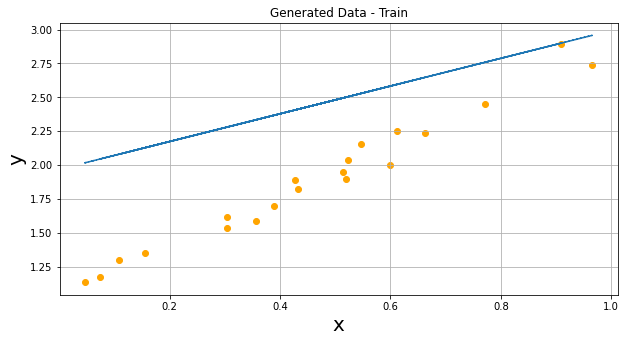

In [15]:
plt.figure(figsize=(10,5))

y_vals = b + a * x_val

plt.plot(x_val, y_vals, '--')

plt.scatter(x_val,y_val, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')
plt.show()

In [46]:
plt.figures(figsize=(10,5))


y_pred = a + b * x_test

plt.plot(x_test, y = pred, '--'

plt.scatter(x_test, y_test, c='orange')

SyntaxError: invalid syntax (<ipython-input-46-6055f3dac607>, line 8)

## check our results use Scikit-learn's linear regression

Just to make sure we haven’t done any mistakes in our code, we can use Scikit-Learn’s Linear Regression to fit the model and compare the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [47]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02267993] [1.97060307]


In [48]:
linr = LinearRegression()

In [49]:
linr.fit(x_train, y_train)

LinearRegression()

In [55]:
print(linr.intercept_, linr.coef_[0])

[1.02267993] [1.97060307]


## The results!

They match up to 6 decimal places — we have a fully working implementation of linear regression using Numpy.

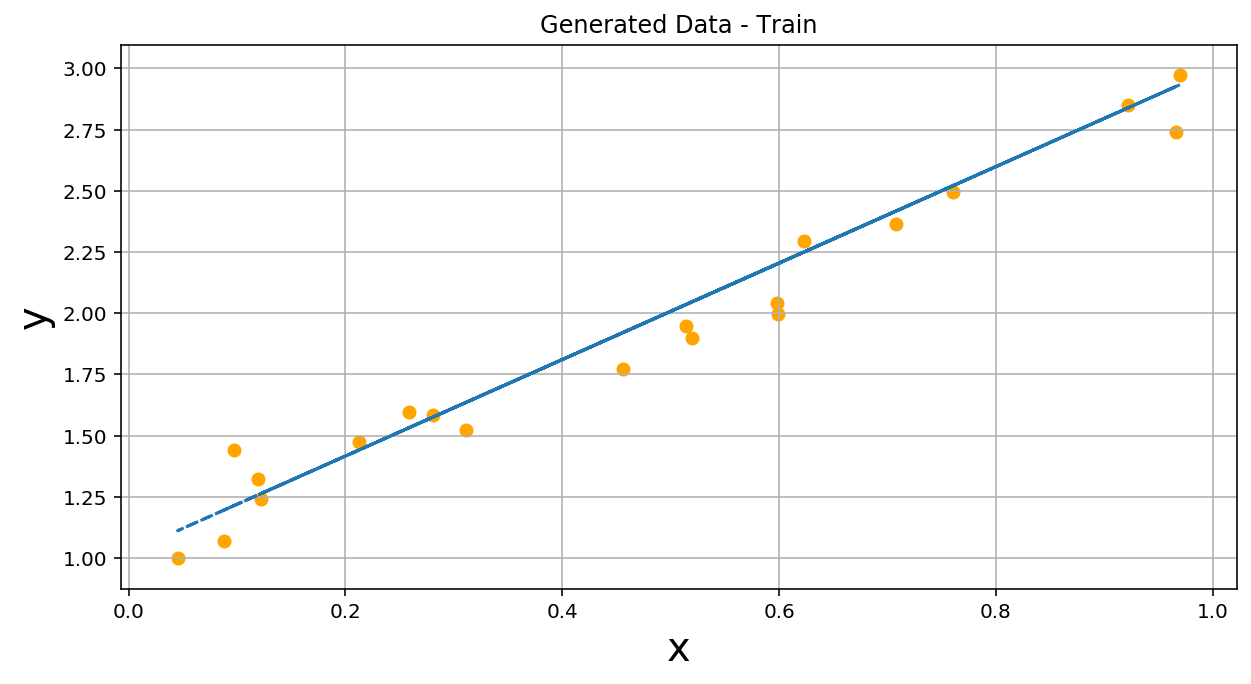

In [62]:
plt.figure(figsize=(10, 5))

y_pred = linr.intercept_ + linr.coef_[0] * x_test

plt.plot(x_test, y_pred, '--')

plt.scatter(x_test, y_test, c='orange')

plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')
plt.show()